In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [3]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

#from testing.test_utils import load_test_output_pn


In [4]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [23]:
############# define run locations #############
resnet_locs = ['/home/jtindall/WatChMaL/outputs/2021-03-01/short_tank_barrel_fix_OD_veto/outputs']

resnet_titles = ['ResNet, charge only']

pointnet_locs = ['/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-01/19-17-05/outputs/',
                 '/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-14-12/outputs/',
                 '/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-17-58/outputs/']

# pointnet_titles = ['PointNet 3-class 40 epoch',
#                    'PointNet 2-class extra data 20 epoch',
#                    'PointNet 2-class extra data 20 epoch no times']
pointnet_titles = ['PointNet 3-class 40 epoch',
                   'PointNet, charge only',
                   'PointNet, charge + time']

resnet_linecolor = [c[0]]
resnet_linestyle = ['-']

pointnet_linecolor = [c[1], c[2], c[2]]
pointnet_linestyle = [':', '--', '-.']

i:  0


FileNotFoundError: [Errno 2] File b'/home/jtindall/WatChMaL/outputs/2021-03-01/short_tank_barrel_fix_OD_veto/outputs/log_val.csv' does not exist: b'/home/jtindall/WatChMaL/outputs/2021-03-01/short_tank_barrel_fix_OD_veto/outputs/log_val.csv'

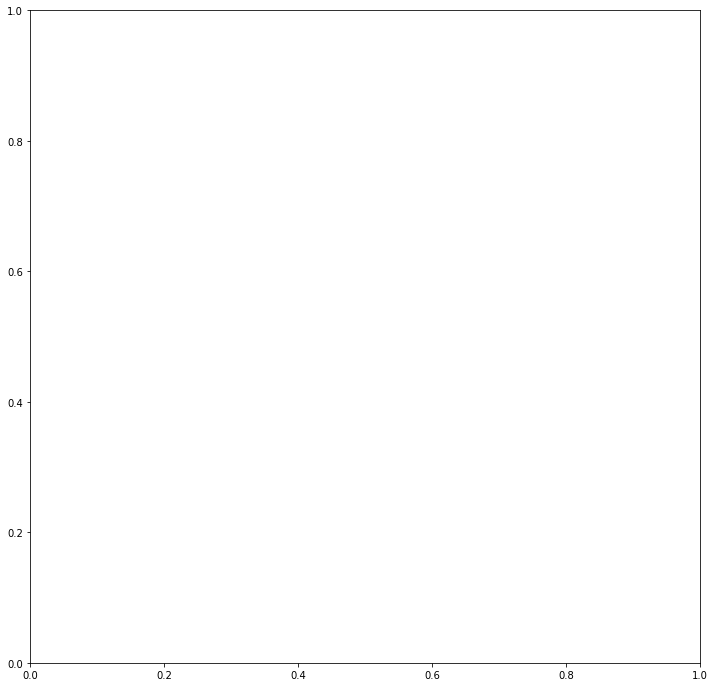

In [6]:
fig = multi_disp_learn_hist(resnet_locs, losslim=2.5, titles=resnet_titles, leg_font=15, title_font=15, xmax=20)

i:  0
Found training logs:  ['/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-01/19-17-05/outputs/log_train_1.csv', '/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-01/19-17-05/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-14-12/outputs/log_train_1.csv', '/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-14-12/outputs/log_train_0.csv']
i:  2
Found training logs:  ['/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-17-58/outputs/log_train_1.csv', '/home/nprouse/WatChMaL/WatChMaL/outputs/2021-03-19/19-17-58/outputs/log_train_0.csv']


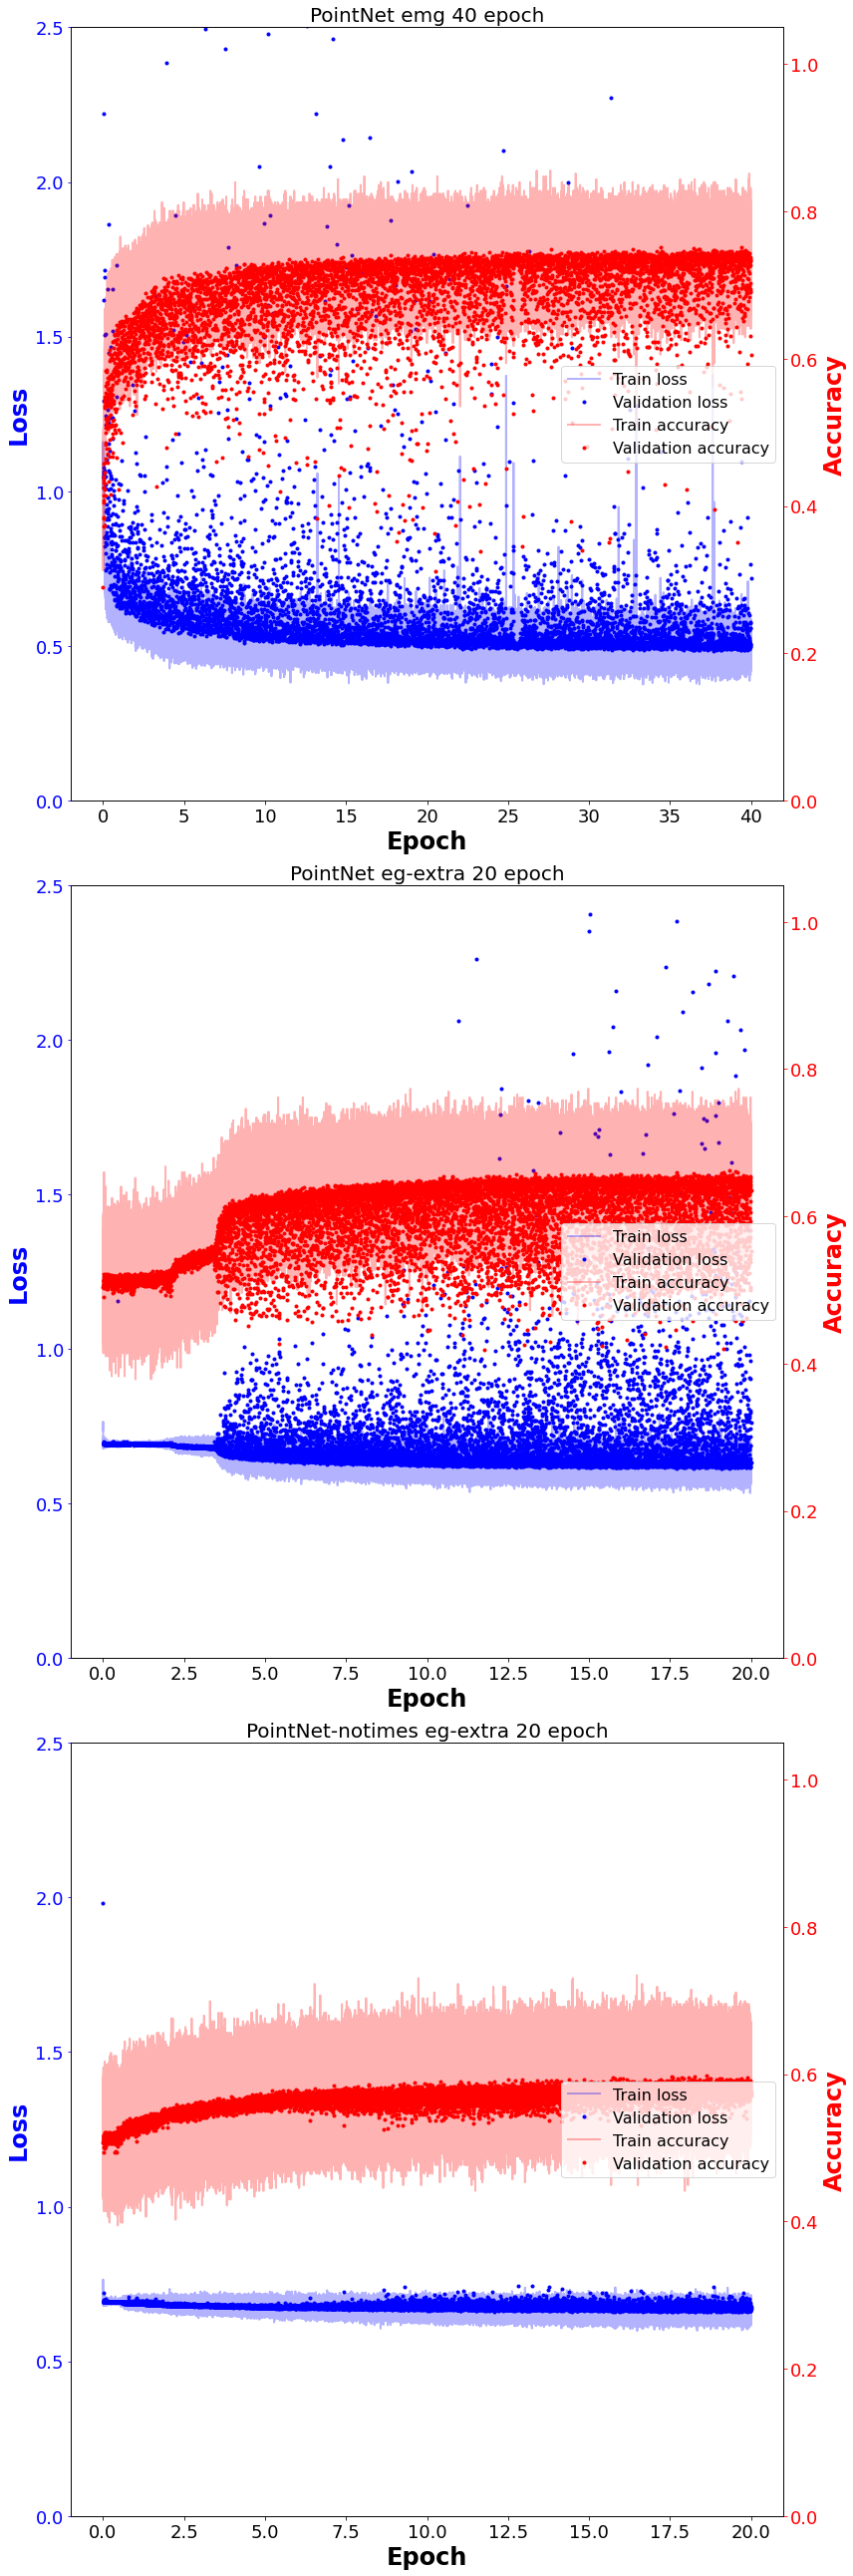

In [70]:
fig = multi_disp_learn_hist(pointnet_locs, losslim=2.5, titles=pointnet_titles, leg_font=15, title_font=15, xmax=40)

In [37]:
resnets = [0]
pointnets=[1,2]

In [38]:
locs = [resnet_locs[i] for i in resnets] + [pointnet_locs[i] for i in pointnets]
titles = [resnet_titles[i] for i in resnets] + [pointnet_titles[i] for i in pointnets]
linecolor = [resnet_linecolor[i] for i in resnets] + [pointnet_linecolor[i] for i in pointnets]
linestyle = [resnet_linestyle[i] for i in resnets] + [pointnet_linestyle[i] for i in pointnets]

In [39]:
############# load short tank run data #############
short_idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_3M_full_train_OD_veto_test_idxs.npz'
short_indices = np.load(short_idx_file_path)['test_idxs']

short_raw_output_softmax    = [np.load(loc + "/softmax.npy") for loc in locs]
short_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in locs]

In [40]:
############# compute short tank multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(short_raw_output_softmax, short_raw_actual_labels,
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


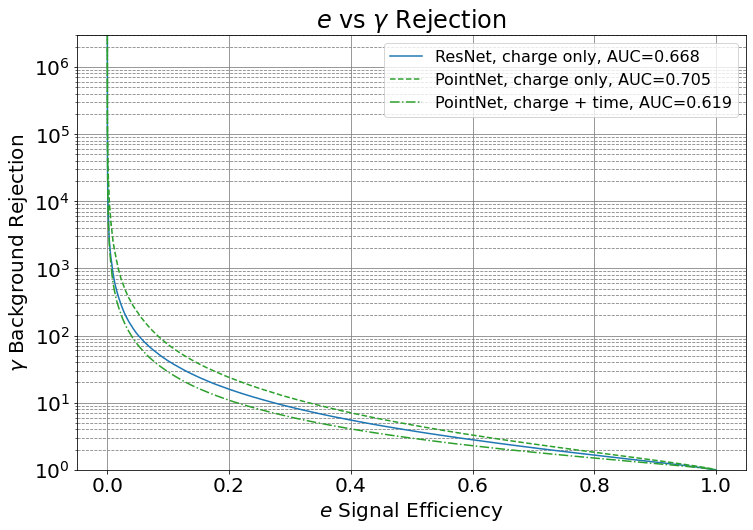

In [41]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[1,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


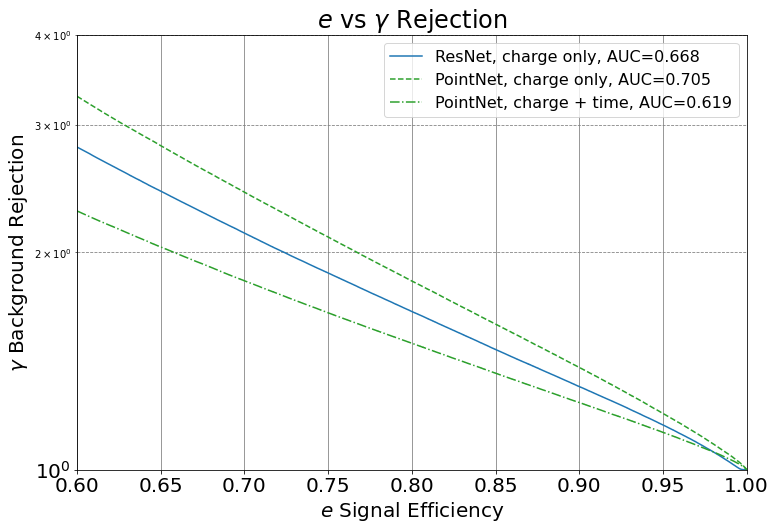

In [42]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.6,1.0]], ylims=[[1,4]],
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)#,
                      #leg_loc='lower left')